In [1]:
using Distributed
addprocs(4)

4-element Array{Int64,1}:
 2
 3
 4
 5

In [2]:
using Plots
#using PyPlot
using JSON
@everywhere include("./Percolation.jl")
@everywhere using .Percolation
using UUIDs
using Dates
using SQLite

In [3]:
@everywhere begin
    using Formatting
    using SymPy
    using Images
    using FileIO
    using Distributed
    using Plots
end

In [4]:
@everywhere using DistributedArrays

In [5]:
using BenchmarkTools

In [6]:
@everywhere pyplot()

In [7]:
function write_sqlite(r;dbname="perc.sqlite")
    conn = SQLite.DB("perc.sqlite")
    SQLite.query(conn, """INSERT INTO
                         simulations(
                         pc,
                         p1,
                         p2,
                         num_surfaces,
                         start_time,
                         end_time,
                         labeling_neighborhood,
                         dec_round, 
                         deltax,
                         accuracy, 
                         perc_direction,
                         data_dir,
                         user)
    VALUES(?,?,?,?,?,?,?,?,?,?,?,?,?)""",
    values=[r["pc"], r["p"][1], r["p"][2], r["numSurf"], 
            string(r["startTime"]), string(r["endTime"]), 
            r["labeling_neighborhood"], r["decRound"],
            r["deltaX"], r["accuracy"], r["perc_direction"], 
            r["data_dir"], r["user"]])
end

write_sqlite (generic function with 1 method)

In [8]:
C = procs()
D = distribute(C)

5-element DArray{Int64,1,Array{Int64,1}}:
 1
 2
 3
 4
 5

In [31]:
"""
    ```MainCode(p; numSurf=500, labeling_neighborhood=4, graphs=["histogram", "percgraph"], 
                     decRound=10, deltaX=0.001, accuracy=0.1, perc_direction="vertical")
    ```
p=[p1,p2] which are between 0 and 1.
numSurf: Number of surfaces to test
labeling_neighborhood: 4 nearest neighbor, 8 next nearest neighbor
graphNums: list of graph types to generate
deltaX:
accuracy:
perc_direction:
"""
function runSurfaces(p; numSurf=500, labeling_neighborhood=4, graphs=["histogram", "percgraph"], 
                     decRound=2, deltaX=0.001, accuracy=0.1, perc_direction="vertical")

    user = ENV["USER"]
    
    ddir = string(uuid4())
    odir = joinpath("data", ddir)
    if ! isdir(odir)
        mkpath(odir)
    end

    startTime = now()
    ssurfaces = collect(1:numSurf);
    psurfaces = distribute(ssurfaces);
    a = (r -> process_surface(p, joinpath(odir, 
                    string("levelsets", format(r, width=4, zeropadding=true ))),
                         labeling_neighborhood=labeling_neighborhood,
                         accuracy=accuracy,
                         n=20, r=500, levels=100,
                         perc_direction=perc_direction))
    rslts = map(a, psurfaces)
    return rslts
end

runSurfaces

In [33]:
length(rslts)

10

In [34]:
rslts = runSurfaces([0.45, 0.75], numSurf=500);

In [35]:
length(rslts)

500

In [41]:
areaFractions = [r[1] for r in rslts];
PAall = reduce(append!, [r[2] for r in rslts]);
NPAall = reduce(append!, [r[3] for r in rslts]);

In [42]:
odir = "data/b9afa54a-efdb-4d32-a860-d3ca43ae6988"

"data/b9afa54a-efdb-4d32-a860-d3ca43ae6988"

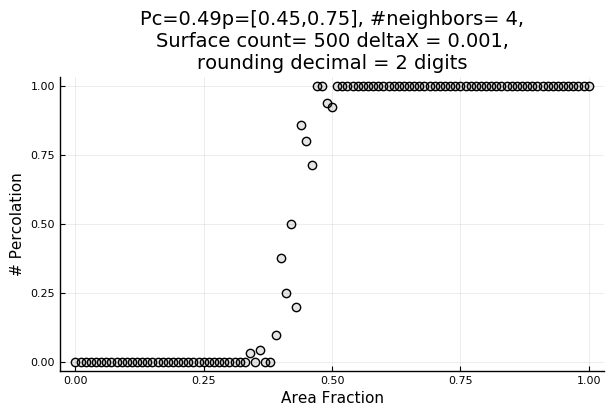

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


0.49

In [43]:
graphPc(odir, 0.001, [0.45, 0.75], PAall, NPAall, 
                     4, 500, decRound=2)

In [15]:
"""
    ```MainCode(p; numSurf=500, labeling_neighborhood=4, graphs=["histogram", "percgraph"], 
                     decRound=10, deltaX=0.001, accuracy=0.1, perc_direction="vertical")
    ```
p=[p1,p2] which are between 0 and 1.
numSurf: Number of surfaces to test
labeling_neighborhood: 4 nearest neighbor, 8 next nearest neighbor
graphNums: list of graph types to generate
deltaX:
accuracy:
perc_direction:
"""
function MainCodeS(p; numSurf=500, labeling_neighborhood=4, graphs=["histogram", "percgraph"], 
                     decRound=2, deltaX=0.001, accuracy=0.1, perc_direction="vertical")

    user = ENV["USER"]
    
    ddir = string(uuid4())
    odir = joinpath("data", ddir)
    if ! isdir(odir)
        mkpath(odir)
    end
    areaFracs = []
    PAall =[]
    NPAall =[]
    z = nothing 
    joinpath(odir, "levelsets")
    startTime = now()
    ssurfaces = collect(1:numSurf);
    a = (r -> process_surface(p, joinpath(odir, 
                    string("levelsets", format(r, width=4, zeropadding=true ))),
                         labeling_neighborhood=labeling_neighborhood,
                         accuracy=accuracy,
                         n=20, r=r, levels=100,
                         perc_direction=perc_direction))
    rslts = map(a, ssurfaces)
    return rslts
end

MainCodeS

In [ ]:
@time walk(100)

In [ ]:
Percolation.walk